<a href="https://colab.research.google.com/github/rodrigo-fernandes092/ProjetoGamaBusca/blob/main/Despesas_Ceaps_2022_2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Problema 01

No momento que rodei para ler o arquivo, apareceu o erro "'utf-8' codec can't decode byte 0xf3 in position 213: invalid continuation byte".

Consegui resolver definindo o sep=';',header=0,encoding='cp1252'

O encoding foi mais difícil de achar, havia tentado outros como 'latin1', 'iso-8859-1' e 'utf-8' mas sem sucesso. Até conseguir o código 'cp1252' que resolveu o meu problema.


In [ ]:
ceaps_22 = pd.read_csv('despesa_ceaps_2022.csv',sep=';',header=1,encoding='cp1252')
ceaps_21 = pd.read_csv('despesa_ceaps_2021.csv',sep=';',header=1,encoding='cp1252')
ceaps_20 = pd.read_csv('despesa_ceaps_2020.csv',sep=';',header=1,encoding='cp1252')
ceaps_19 = pd.read_csv('despesa_ceaps_2019.csv',sep=';',header=1,encoding='cp1252')
ceaps_18 = pd.read_csv('despesa_ceaps_2018.csv',sep=';',header=1,encoding='cp1252')



# Checando os datasets
Verificando se as bases de dados estão com os mesmos formatos e tipo de dados


In [ ]:
ceaps_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3749 entries, 0 to 3748
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ANO                3749 non-null   int64 
 1   MES                3749 non-null   int64 
 2   SENADOR            3749 non-null   object
 3   TIPO_DESPESA       3749 non-null   object
 4   CNPJ_CPF           3749 non-null   object
 5   FORNECEDOR         3749 non-null   object
 6   DOCUMENTO          3583 non-null   object
 7   DATA               3749 non-null   object
 8   DETALHAMENTO       1907 non-null   object
 9   VALOR_REEMBOLSADO  3749 non-null   object
 10  COD_DOCUMENTO      3749 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 322.3+ KB


In [ ]:
ceaps_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16808 entries, 0 to 16807
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ANO                16808 non-null  int64 
 1   MES                16808 non-null  int64 
 2   SENADOR            16808 non-null  object
 3   TIPO_DESPESA       16808 non-null  object
 4   CNPJ_CPF           16808 non-null  object
 5   FORNECEDOR         16808 non-null  object
 6   DOCUMENTO          16133 non-null  object
 7   DATA               16808 non-null  object
 8   DETALHAMENTO       9193 non-null   object
 9   VALOR_REEMBOLSADO  16808 non-null  object
 10  COD_DOCUMENTO      16808 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 1.4+ MB


In [ ]:
ceaps_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14090 entries, 0 to 14089
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ANO                14090 non-null  int64 
 1   MES                14090 non-null  int64 
 2   SENADOR            14090 non-null  object
 3   TIPO_DESPESA       14090 non-null  object
 4   CNPJ_CPF           14090 non-null  object
 5   FORNECEDOR         14090 non-null  object
 6   DOCUMENTO          13470 non-null  object
 7   DATA               14090 non-null  object
 8   DETALHAMENTO       7228 non-null   object
 9   VALOR_REEMBOLSADO  14090 non-null  object
 10  COD_DOCUMENTO      14090 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 1.2+ MB


In [ ]:
ceaps_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21634 entries, 0 to 21633
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ANO                21634 non-null  int64 
 1   MES                21634 non-null  int64 
 2   SENADOR            21634 non-null  object
 3   TIPO_DESPESA       21634 non-null  object
 4   CNPJ_CPF           21634 non-null  object
 5   FORNECEDOR         21634 non-null  object
 6   DOCUMENTO          20900 non-null  object
 7   DATA               21634 non-null  object
 8   DETALHAMENTO       13092 non-null  object
 9   VALOR_REEMBOLSADO  21634 non-null  object
 10  COD_DOCUMENTO      21634 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 1.8+ MB


In [ ]:
ceaps_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24492 entries, 0 to 24491
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ANO                24492 non-null  int64 
 1   MES                24492 non-null  int64 
 2   SENADOR            24492 non-null  object
 3   TIPO_DESPESA       24492 non-null  object
 4   CNPJ_CPF           24492 non-null  object
 5   FORNECEDOR         24492 non-null  object
 6   DOCUMENTO          23476 non-null  object
 7   DATA               24492 non-null  object
 8   DETALHAMENTO       18882 non-null  object
 9   VALOR_REEMBOLSADO  24492 non-null  object
 10  COD_DOCUMENTO      24492 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 2.1+ MB


# Unindo os Datasets

Após confirmar que as bases de dados estão no mesmo padrão. Unifiquei elas em um mesmo DataFrame, facilitando a transformação e limpeza de dados.

In [ ]:
ceaps_total=[ceaps_22,ceaps_21,ceaps_20,ceaps_19,ceaps_18]

ceaps = pd.concat(ceaps_total)

ceaps.head(3)

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
0,2022,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/22,03/01/2022,Despesa com pagamento de aluguel de imóvel par...,6000,2173614
1,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,26.320.603/0001-64,INFORMANAHORA,000000000000310/A,04/01/2022,Despesa com divulgação da atividade parlamenta...,1500,2173615
2,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,13.659.201/0001-47,LINHA PURPURA FOTO E VIDEO LTDA,107,14/01/2022,Despesa com produção de texto e edição de víde...,6000,2173616


# Renomeando as colunas do DataFrame

O nome das colunas estão objetivas, mas irei deixa-las em letra minuscula para facilitar a escrita.


In [ ]:
columns=['ano','mes','senador','tipo_despesa','cnpj_cpf','fornecedor',\
         'documento','data','detalhamento','valor_reembolsado','cod_documento']

ceaps.set_axis(columns,axis='columns',inplace=True)
ceaps.columns

Index(['ano', 'mes', 'senador', 'tipo_despesa', 'cnpj_cpf', 'fornecedor',
       'documento', 'data', 'detalhamento', 'valor_reembolsado',
       'cod_documento'],
      dtype='object')

# Analisando as informações Nulas no DataFrame

df.info()

É uma ótima maneira de verificar a sua base de dados. Com ele, é possível ver o tipo de formato por coluna e quais colunas possuem valoes nulos.

In [ ]:
ceaps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80773 entries, 0 to 24491
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ano                80773 non-null  int64 
 1   mes                80773 non-null  int64 
 2   senador            80773 non-null  object
 3   tipo_despesa       80773 non-null  object
 4   cnpj_cpf           80773 non-null  object
 5   fornecedor         80773 non-null  object
 6   documento          77562 non-null  object
 7   data               80773 non-null  object
 8   detalhamento       50302 non-null  object
 9   valor_reembolsado  80773 non-null  object
 10  cod_documento      80773 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 7.4+ MB


In [ ]:
print('Informações faltantes na coluna Documento:',round(((80773-77562)/80773)*100,2),'%')

print('Informações faltantes na coluna Detalhamento:',round(((80773-50302)/80773)*100,2),'%')

Informações faltantes na coluna Documento: 3.98 %
Informações faltantes na coluna Detalhamento: 37.72 %


# Problema 02

No momento da alteração do tipo de dado string (texto) para float (valor flotuante). Apresentou erro, pois na coluna há valores de reembolso com centavos representados pela **vírgula**. <p>

Para o Python, a vírgula representa separação para valores a partir de mil e valores decimais são representados por ponto final. Por ex: 1,850.63


Para resolver este problema. Utilizei str.replace('x','y')

str -  informar que o tipo de dado é texto
replace('x','y') - substituir o valor antigo 'x' para o valor novo 'y'



In [ ]:

ceaps['valor_reembolsado']=ceaps.valor_reembolsado.str.replace(',','.')

ceaps.valor_reembolsado.unique()

array(['6000', '1500', '1000', ..., '486.25', '1132.69', '1260.45'],
      dtype=object)

In [ ]:
ceaps['valor_reembolsado']=  ceaps.valor_reembolsado.astype('float64',copy=False)
ceaps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80773 entries, 0 to 24491
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ano                80773 non-null  int64  
 1   mes                80773 non-null  int64  
 2   senador            80773 non-null  object 
 3   tipo_despesa       80773 non-null  object 
 4   cnpj_cpf           80773 non-null  object 
 5   fornecedor         80773 non-null  object 
 6   documento          77562 non-null  object 
 7   data               80773 non-null  object 
 8   detalhamento       50302 non-null  object 
 9   valor_reembolsado  80773 non-null  float64
 10  cod_documento      80773 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 7.4+ MB


# Valores Nulos

Substitui os valores nulos por "sem_dados". Pois pretendo analisar quais são os representantes publicos que possuem maior quantidade de dados faltantes e quanto isso representa.

In [ ]:
ceaps['detalhamento'] = ceaps.detalhamento.replace(np.nan,'sem_dados')
ceaps[ceaps.detalhamento=='sem_dados'].detalhamento.count()

30471

In [ ]:
ceaps.detalhamento

0        Despesa com pagamento de aluguel de imóvel par...
1        Despesa com divulgação da atividade parlamenta...
2        Despesa com produção de texto e edição de víde...
3                      Divulgação da atividade parlamentar
4                      Divulgação da atividade parlamentar
                               ...                        
24487                                            sem_dados
24488                                            sem_dados
24489                                            sem_dados
24490    Companhia Aérea: AZUL, Localizador: CI5PSK. Pa...
24491    Companhia Aérea: LATAM, Localizador: OHNRAG. P...
Name: detalhamento, Length: 80773, dtype: object

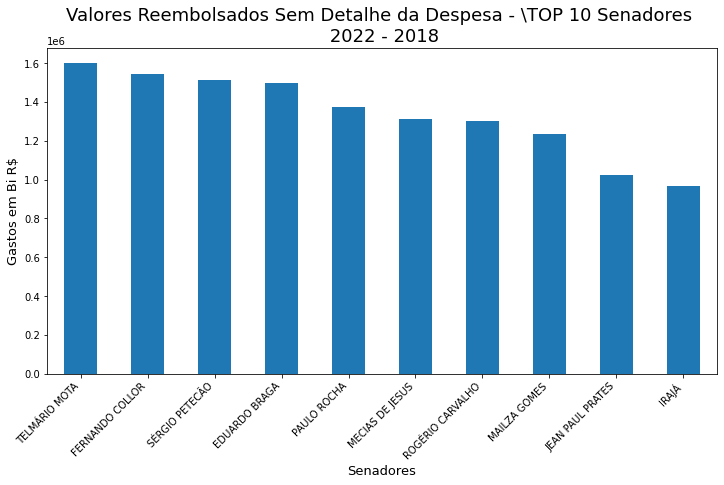

In [ ]:

plt.figure(figsize=(12,6))
ceaps[ceaps.detalhamento == 'sem_dados']\
.groupby(by=('senador'))['valor_reembolsado']\
.sum().sort_values(ascending=False).head(10).plot.bar()
plt.xticks(rotation=45,ha='right');
plt.ylabel('Gastos em Bi R$',size=13)
plt.xlabel('Senadores',size=13)
plt.title('Valores Reembolsados Sem Detalhe da Despesa - \TOP 10 Senadores \n 2022 - 2018', size=18);